## Handling Missing Value

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("./Churn_Modelling.csv")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## The second way of finding the null value is isnull() function.

In [33]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Handling Missing Values

### 1. Deleting the columns with missing data

In [34]:
updated_df = data.dropna(axis=1)

In [35]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### The problem with this method is that we may lose valuable information on tha t feature, as we have deleted it completely due to some null value.

### 2. Deleting the rows with missing data.

In [36]:
updated_df = data.dropna(axis=0)

## 3. Filling the Missing Values - Imputation

In [37]:
data['Age'].mean()

38.9218

In [38]:
data['Age'].median()

37.0

In [39]:
# fillna : fills the null records
# dropna : drops the null records

In [40]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

## 4. Forward & Backward Filling - Imputation

In [41]:
df = pd.read_csv("./Churn_Modelling.csv")

In [42]:
# backward fill
df['Age'] = df['Age'].bfill(axis=0)

In [43]:
# forward fill
df['Age'] = df['Age'].ffill(axis=0)

## 5. Finding the only Object type Data

In [44]:
df.select_dtypes(include=['object']).isnull().sum()

Surname      0
Geography    0
Gender       0
dtype: int64

In [45]:
for i in df.select_dtypes(include=['object']).columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [46]:
# Generate a sample retail store dataset with 100 products, their prices, and quantities
np.random.seed(42)  # For reproducibility

product_names = [f"Product_{i+1}" for i in range(100)]
prices = np.round(np.random.uniform(5, 500, size=100), 2)  # Prices between $5 and $500
quantities = np.random.randint(1, 100, size=100)  # Quantities between 1 and 99

retail_df = pd.DataFrame({
    'Product': product_names,
    'Price': prices,
    'Quantity': quantities
})

retail_df.head()

,Product,Price,Quantity
0,Product_1,190.40,63
1,Product_2,475.60,96
2,Product_3,367.34,52
3,Product_4,301.34,96
4,Product_5,82.23,4


To add a new column `Quantity Sold` to the `retail_df` dataset, you can use the following code:



In [47]:
# Add a new column 'Quantity Sold' with random values
np.random.seed(42)  # For reproducibility
retail_df['Quantity Sold'] = np.random.randint(1, 50, size=100)  # Random values between 1 and 50

# Display the updated dataframe
retail_df.head()

,Product,Price,Quantity,Quantity Sold
0,Product_1,190.40,63,39
1,Product_2,475.60,96,29
2,Product_3,367.34,52,15
3,Product_4,301.34,96,43
4,Product_5,82.23,4,8




### Explanation:
1. **`Quantity Sold`**: This column represents the number of units sold for each product.
2. **Random Values**: Generated using `np.random.randint()` with values between 1 and 50.
3. **Reproducibility**: The seed (`np.random.seed(42)`) ensures consistent random values across runs.

Here is the code to visualize the correlation between `Price` and `Quantity Sold` using a scatter plot:



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=retail_df,
    x='Price',
    y='Quantity Sold',
    color='blue',
    alpha=0.7
)

# Add title and axis labels
plt.title('Scatter Plot of Price vs Quantity Sold', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)

# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



### Explanation:
1. **Scatter Plot**: Visualizes the relationship between `Price` and `Quantity Sold`.
2. **Transparency**: `alpha=0.7` makes overlapping points easier to interpret.
3. **Labels and Title**: Added for clarity.
4. **Grid**: Helps interpret the values on both axes.

In [48]:
retail_df.head()

,Product,Price,Quantity,Quantity Sold
0,Product_1,190.40,63,39
1,Product_2,475.60,96,29
2,Product_3,367.34,52,15
3,Product_4,301.34,96,43
4,Product_5,82.23,4,8


In [49]:
retail_df['Price'].mean()

237.7397

In [50]:
retail_df['Price'].std()

147.25756482055104

In [51]:
z_scores = (retail_df['Price']-retail_df['Price'].mean())/retail_df['Price'].std()
z_scores

0    -0.321476
1     1.615267
2     0.880093
3     0.431898
4    -1.056039
        ...   
95    0.079387
96    0.176631
97   -0.143352
98   -1.495065
99   -1.217796
Name: Price, Length: 100, dtype: float64

In [52]:
retail_df['z_score'] = z_scores

In [53]:
retail_df.head()

,Product,Price,Quantity,Quantity Sold,z_score
0,Product_1,190.40,63,39,-0.321476
1,Product_2,475.60,96,29,1.615267
2,Product_3,367.34,52,15,0.880093
3,Product_4,301.34,96,43,0.431898
4,Product_5,82.23,4,8,-1.056039


Here is the code to create a distribution plot for the `Price` column in `retail_df`, including mean, median, mode, and z-scores:



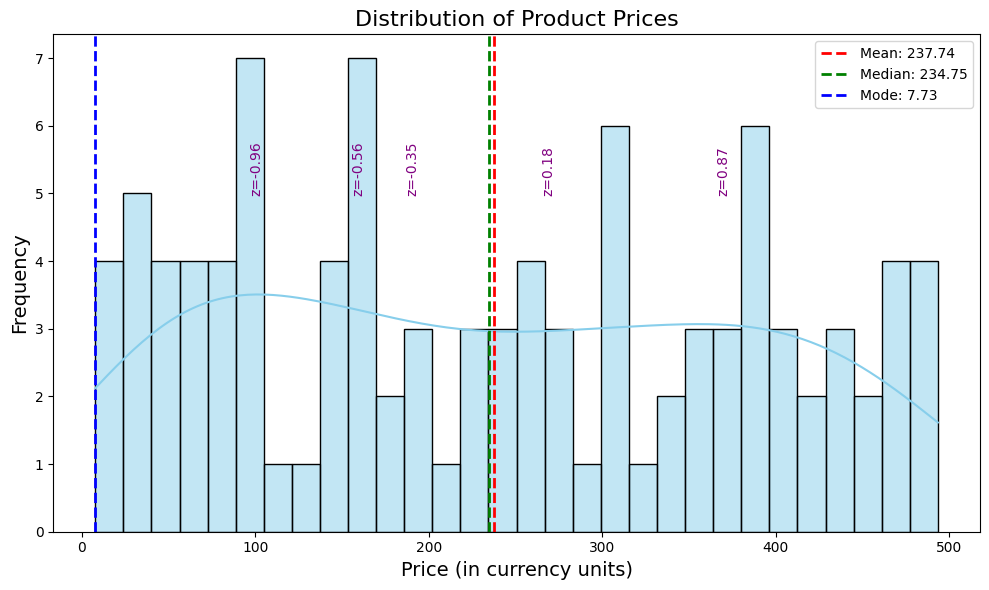

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate statistics
mean_price = retail_df['Price'].mean()
median_price = retail_df['Price'].median()
mode_price = retail_df['Price'].mode()[0]

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=retail_df,
    x='Price',
    kde=True,  # Add Kernel Density Estimate (KDE) for smooth curve
    bins=30,   # Set number of bins
    color='skyblue',
    edgecolor='black'
)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_price:.2f}")
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_price:.2f}")
plt.axvline(mode_price, color='blue', linestyle='dashed', linewidth=2, label=f"Mode: {mode_price:.2f}")

# Add z-scores as annotations
z_scores = (retail_df['Price'] - mean_price) / retail_df['Price'].std()
for i, price in enumerate(retail_df['Price'].sample(5)):  # Annotate 5 random points
    z_score = z_scores[retail_df['Price'] == price].values[0]
    plt.text(price, 5, f"z={z_score:.2f}", fontsize=10, color='purple', rotation=90)

# Add title and labels
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



### Explanation:
1. **Mean, Median, Mode**: Calculated and displayed as dashed vertical lines.
2. **Z-Scores**: Annotated for 5 random points in the distribution.
3. **Histogram**: Shows the frequency distribution of prices with KDE for smoothness.
4. **Legend**: Helps identify the statistical markers.
5. **Annotations**: Z-scores are displayed near selected points for better understanding.

<Axes: xlabel='Price', ylabel='Count'>

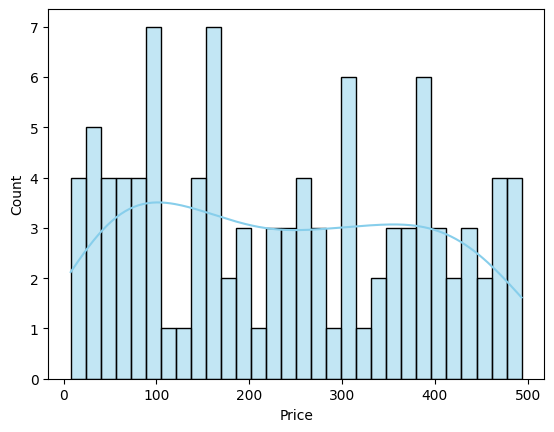

In [55]:
sns.histplot(data=retail_df, x='Price', kde=True, bins=30, color='skyblue', edgecolor='black')

Here is the code to create a curve plot for the `Price` column in `retail_df` using a Kernel Density Estimate (KDE):



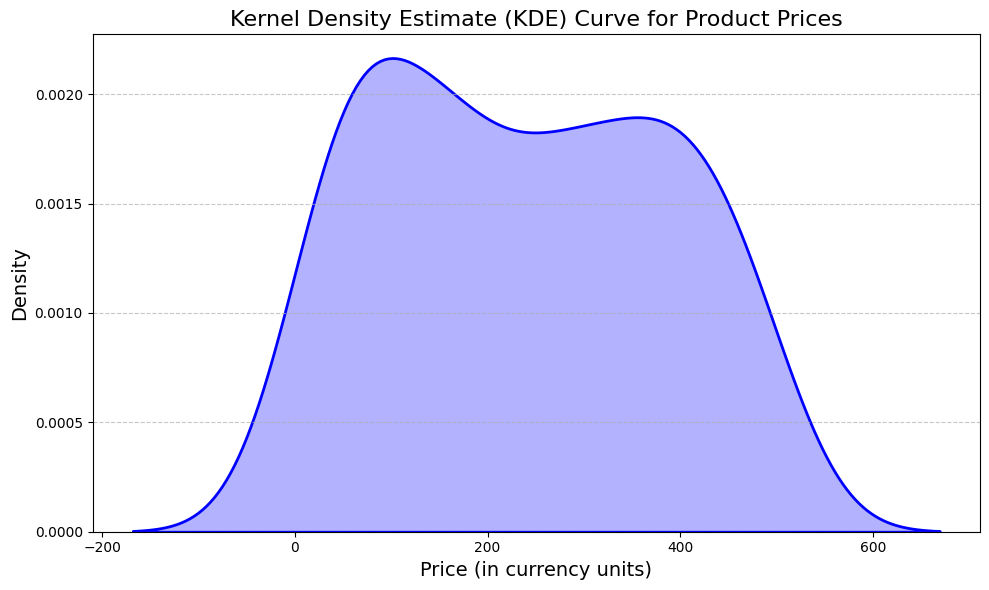

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the curve plot (KDE plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=retail_df,
    x='Price',
    color='blue',
    linewidth=2,
    fill=True,  # Fill the area under the curve
    alpha=0.3   # Set transparency for the fill
)

# Add title and axis labels
plt.title('Kernel Density Estimate (KDE) Curve for Product Prices', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



### Explanation:
1. **KDE Plot**: Displays the density curve for the `Price` column.
2. **Fill Area**: The area under the curve is filled for better visualization.
3. **Transparency**: `alpha=0.3` makes the fill slightly transparent.
4. **Labels and Title**: Added for clarity.
5. **Grid**: Helps interpret the density values.

Here is an example of a visualization using a scatter plot to show the relationship between `Price` and `Quantity` in the `retail_df` dataset:



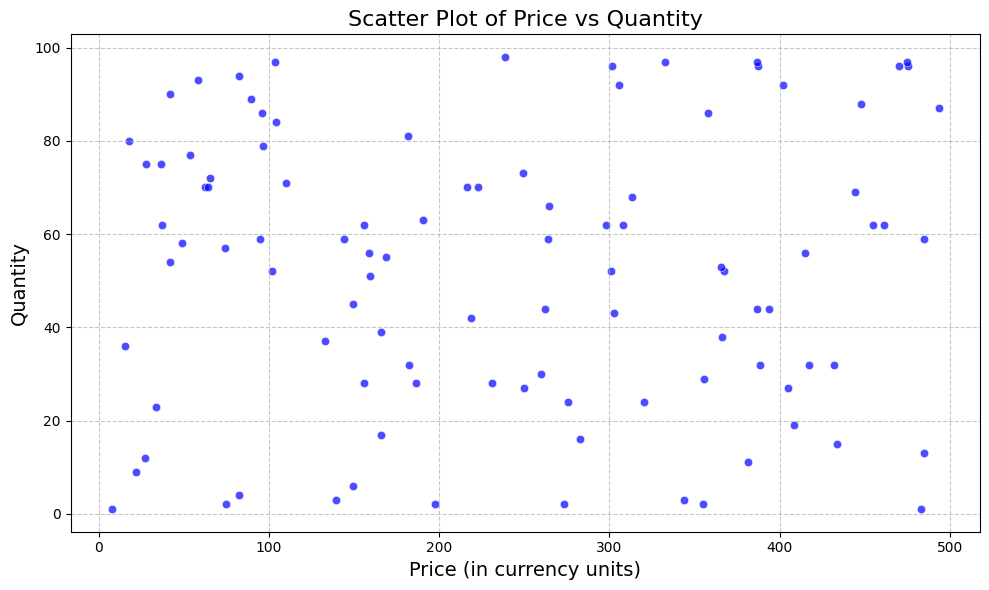

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=retail_df,
    x='Price',
    y='Quantity',
    color='blue',
    alpha=0.7
)

# Add title and axis labels
plt.title('Scatter Plot of Price vs Quantity', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



### Explanation:
1. **Scatter Plot**: Visualizes the relationship between `Price` and `Quantity`.
2. **Transparency**: `alpha=0.7` makes overlapping points easier to interpret.
3. **Labels and Title**: Added for clarity.
4. **Grid**: Helps interpret the values on both axes.

Here is the code to visualize the correlation between `Price` and `Quantity Sold` using a scatter plot:



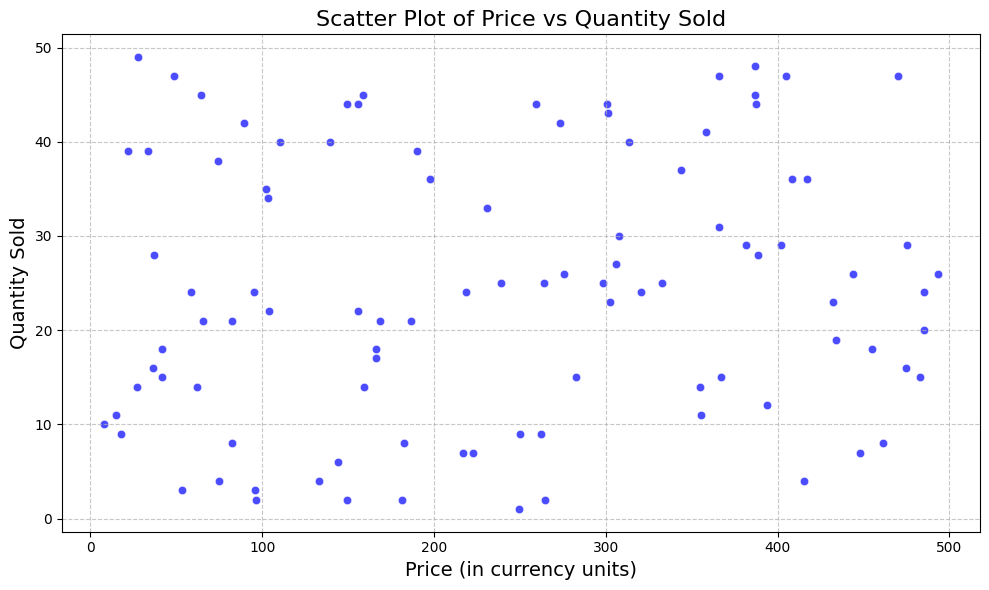

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=retail_df,
    x='Price',
    y='Quantity Sold',
    color='blue',
    alpha=0.7
)

# Add title and axis labels
plt.title('Scatter Plot of Price vs Quantity Sold', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)

# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



### Explanation:
1. **Scatter Plot**: Visualizes the relationship between `Price` and `Quantity Sold`.
2. **Transparency**: `alpha=0.7` makes overlapping points easier to interpret.
3. **Labels and Title**: Added for clarity.
4. **Grid**: Helps interpret the values on both axes.

In [59]:
import numpy as np
from scipy import stats

# Sample data
sample = [385, 374, 456, 284, 457, 119, 324, 137, 438, 448,
          332, 476, 392, 210, 332, 378, 371, 184, 417, 393]

# Hypothesized population mean
mu = 350  

# Assume population standard deviation (σ)
sigma = 50  

# Step 1: Calculate sample mean
sample_mean = np.mean(sample)
n = len(sample)

# Step 2: Calculate Z score
z_score = (sample_mean - mu) / (sigma / np.sqrt(n))

# Step 3: Find p-value (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value:", p_value)

# Step 4: Decision at alpha = 0.05
if p_value < 0.05:
    print("Reject Null Hypothesis (significant difference)")
else:
    print("Fail to Reject Null Hypothesis (no significant difference)")


Sample Mean: 345.35
Z-Score: -0.4159086438149589
P-Value: 0.6774768541738061
Fail to Reject Null Hypothesis (no significant difference)
